- TN : True Negative
- FN : False Negative
- FP : False Positive
- TP : True Positive
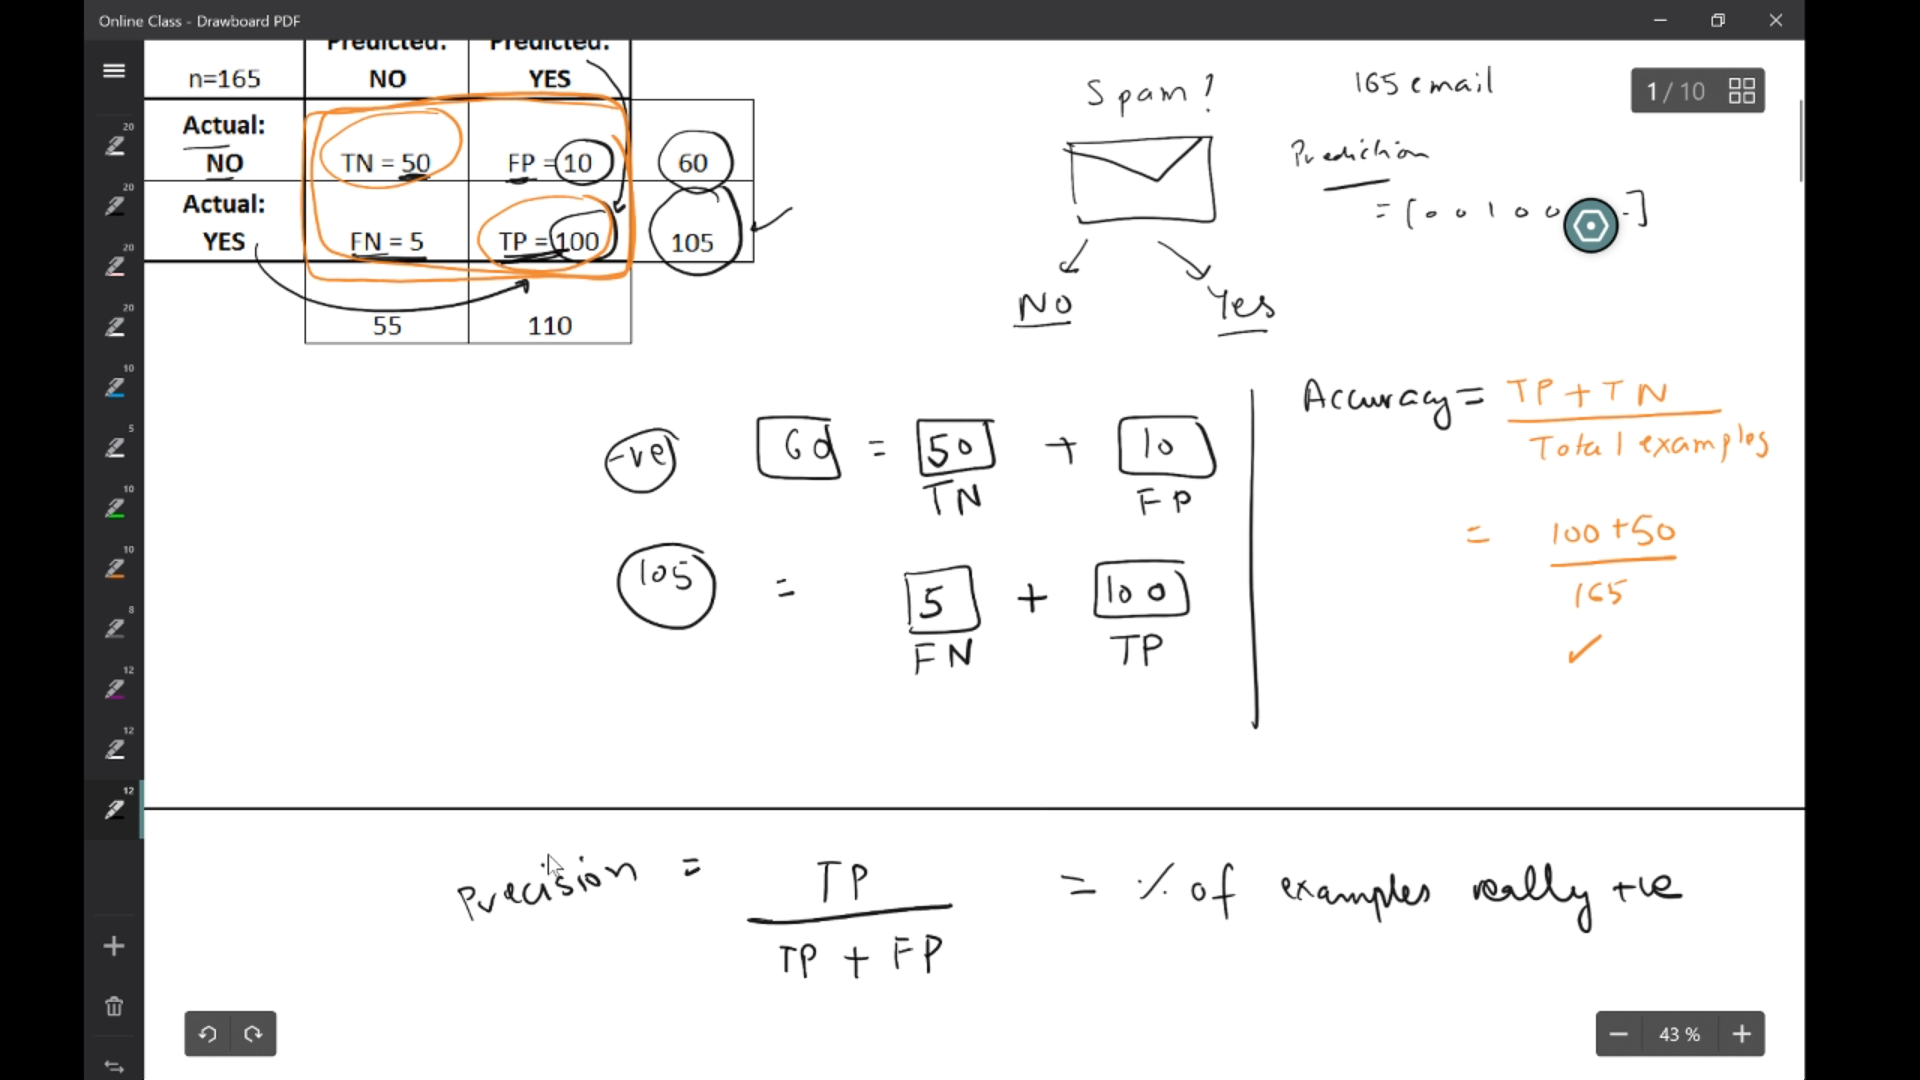
$Recall:=\frac{TP}{TP+FN}$
- Recall is percentage of examples are really positive
- $F-Measure$ is lies between 0 to 1
- It is a harmonic mean of precision.
- $F-Measure = \frac{2*TP}{2*TP + FP + FN}$
- It is used to measure the performance of the model

## Using Gaussian Binary Classification to build confusion matrix

In [1]:
from sklearn.naive_bayes import GaussianNB

In [2]:
gnb = GaussianNB()

In [3]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

In [4]:
X, Y = make_classification(n_samples = 200, n_features = 2, n_informative = 2, n_redundant = 0, random_state = 5)

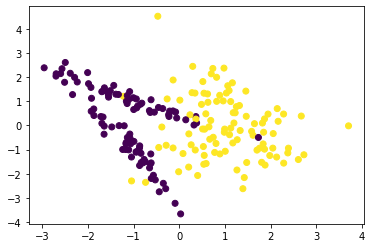

In [5]:
plt.scatter(X[:,0], X[:,1], c = Y)
plt.show()

In [6]:
print(X[0])

[-2.29208426  1.98909368]


In [7]:
print(X.shape) # continues values feature

(200, 2)


In [8]:
# Train our classifier
gnb.fit(X,Y)

GaussianNB()

In [9]:
gnb.score(X,Y)

0.915

In [10]:
y_pred = gnb.predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1])

In [11]:
acc = (np.sum(y_pred == Y))/X.shape[0]

In [12]:
print(acc)

0.915


In [22]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

### Generate Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
cnf_matrix = confusion_matrix(Y,y_pred)

In [25]:
cnf_matrix

# 93 : TP
# 90 : TN 
# 7 : FP
# 10 : FN


array([[93,  7],
       [10, 90]], dtype=int64)

### Visualize Confusion Matrix

Confusion matrix, without normalization
[[93  7]
 [10 90]]


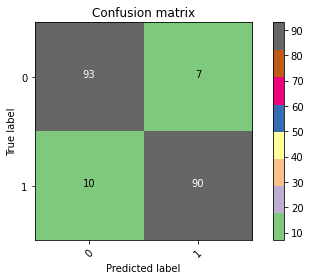

In [27]:
plot_confusion_matrix(cnf_matrix,[0,1], normalize = False,cmap=plt.cm.Accent)